# EDA (Exploratory Data Analysis) with Pandas
==================================
## We will start with importing our libraries - NumPy and Pandas
----------

In [11]:
import numpy as np
import pandas as pd
from datetime import time
import warnings
warnings.filterwarnings('ignore')

### Here we denote our dataset to the frame and denote it as "test_df"
-----------
**Some info about dataset:**

*Survived: Survived (1) or died (0)* <br>
*Pclass:   Passenger's class (1st, 2nd, or 3rd)*<br>
*Fare:     Fare paid for ticket*<br>
*SibSp:    Number of siblings/spouses aboard the Titanic*<br>
*Parch:    Number of parents/children aboard the Titanic*<br>
*Embarked: Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)*<br>


------------------------------------------------------------

In [27]:
train_df = pd.read_csv('./Datasets/titanic/train.csv')

<br><br>
**Let's check what columns we have in a header**

In [28]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<br><br>
**.head() - shows us first 5 lines and .tail() - shows us last 5 lines of data**
<br>

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<br><br>
**Let’s have a look at data dimensionality, feature names, and feature types.**
<br>

In [31]:
train_df.shape

(891, 12)

In [32]:
print('='*40)
print(train_df.info())
print('='*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None



### Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.
-----------


In [33]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<br><br>
**Now we will see how much elements contant these categories in columns.**
<br>

In [34]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<br><br>
### Let's make a pause after this step, and analyze what we got after our actions
-------------------
<br>

__Total passengers = 891__<br>
Male / Female = 577 / 314 <br>
<br>
__Embarked from:__<br>
C - Cherbourg = 168<br>
S - Southampton = 644<br>
Q = Queenstown = 77<br>
Unknown = 2<br>
*It turns out that most of the passengers were from Southampton - __it's 72% from Total__*<br>
<br>
__Passenger's class:__<br>
1 class = 216<br>
2 class = 184<br>
3 class = 491<br>


<br>The sort function can be used to sort a list in ascending, descending or user defined order. Here we will use asending order.<br>

In [37]:
train_df.sort_values(by=["Survived", "Age"], ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


<br><br>And now let's add a little visualisation after importing Seaborn and Matplotlib<br>

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

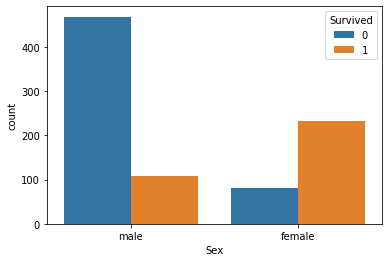

In [60]:
sns.countplot(x='Sex', hue='Survived', data=train_df);


In [51]:
pd.crosstab(train_df['Age'], train_df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


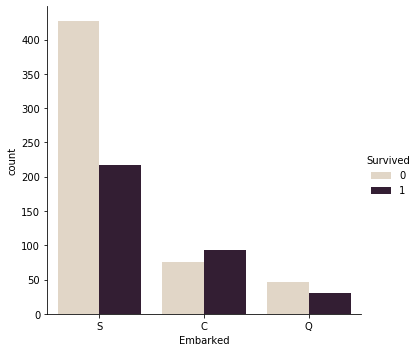

In [83]:
sns.catplot(x="Embarked", hue='Survived', kind="count", palette="ch:.24", data=train_df);

In [86]:
pd.crosstab(train_df['Embarked'], train_df['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


----------------
## What we have got after these analysis? 

#### Let's make Percentage analysis of these Visualisations
<br> <br>
Difference between Died and Survived:<br>
Died - men 81.1% (!) and women 25.8% <br>
Survived - men - 18.9% and women 74.2%<br>

P.S Brave heroes been on the boat
<br><br>
Difference between Died and Survived from: 
Died / Survived - Cherbourg = 44.6% / 55.4% <br>
Died / Survived - Southampton = 66.3% / 33.7% <br>
Died / Survived Queenstown = 61% / 39% <br>
